# **Image Classification For Breast Cancer Detection**

# **Breast Cancer and H&E Staining**

## **Breast Cancer**

Breast cancer is the type of cancer that begins in the cells of the breast. It can occur in both men and women, but it is far more common and the second most common (after skin cancer) in women. These cancers are characterized by abnormal growth of certain breast cells that divide more rapidly than healthy cells causing a lump or mass. These cells can spread to the lymph nodes and other parts of the body [(Mayo Clinic)](https://www.mayoclinic.org/diseases-conditions/breast-cancer/symptoms-causes/syc-20352470#:~:text=Doctors%20know%20that%20breast%20cancer,other%20parts%20of%20your%20body.).

Breast cancer can be detected through various methods, including medical imaging like mammography, ultrasound, and magnetic resonance imaging (MRI), as well as through histopathologic examination of tissue samples. Usually, medical imaging techniques are done manually by experts. This poses a few challenges such as lack of experts, chances for False predictions, and human errors [(Zhu et al., 2023)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7614504/).

Convolutional Neural Network (CNN) designs are widely used as stand-alone or in combination with other models for medical image analysis with higher accuracy outcomes. This project focuses on testing two models for the image analysis of breast cancer detection. [(Zhu et al., 2023)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7614504/).


## **H&E Staining**

Hematoxylin and eosin (H & E) staining is a widely used technique in histology to visualize the microscopic structure of tissues. The technique helps in identifying different tissues types in a sample. Hematoxylin stains cell nuclei deep blue-purple reacting with nucleic acids, while eosin stains cytoplasm and extracellular matrix pink reacting with proteins. H&E staining is commonly used in pathology to examine tissue samples and identify abnormalities, including cancerous cells [(Fischer et al., 2008)](https://pubmed.ncbi.nlm.nih.gov/21356829/).

![imag](H&Estaining.png)

> Fig.: H & E staining of normal and breast cancer tissues. Histopathological observation of normal and tumor sections represents the mammary tissues from various experimental rat groups. The arrow shows a breast normal duct. (A), LA7-induced breast tumor (B), FLAHE low-dose treatment (C), FLAHE high-dose treatment (D), and tamoxifen-treated group (E). Histological examination of normal breast and tumor breast cancer before and after FALHE treatment. The normal breast shows normal duct tissues, but the LA7-induced breast tumor shows a disruption in morphology and an invasion of ductal cells throughout the breast tissues. Magnification, 40×. [(Tellez et al., 2018)](https://www.researchgate.net/publication/324073594_Whole-Slide_Mitosis_Detection_in_HE_Breast_Histology_Using_PHH3_as_a_Reference_to_Train_Distilled_Stain-Invariant_Convolutional_Networks#pf2)

***References***

`Zhu Z, Wang SH, Zhang YD. A Survey of Convolutional Neural Network in Breast Cancer. Comput Model Eng Sci. 2023 Mar 9;136(3):2127-2172. doi: 10.32604/cmes.2023.025484. PMID: 37152661; PMCID: PMC7614504.`

`Fischer AH, Jacobson KA, Rose J, Zeller R. Hematoxylin and eosin staining of tissue and cell sections. CSH Protoc. 2008 May 1;2008:pdb.prot4986. doi: 10.1101/pdb.prot4986. PMID: 21356829.`

Image source: `Tellez, David & Balkenhol, Maschenka & Otte-Höller, Irene & Loo, Rob & Vogels, Rob & Bult, Peter & Wauters, Carla & Vreuls, Willem & Mol, Suzanne & Karssemeijer, Nico & Litjens, Geert & van der Laak, Jeroen & Ciompi, Francesco. (2018). Whole-Slide Mitosis Detection in H&E Breast Histology Using PHH3 as a Reference to Train Distilled Stain-Invariant Convolutional Networks. IEEE Transactions on Medical Imaging. PP. 1-1. 10.1109/TMI.2018.2820199. `

# **Model Definition and Training Strategies**

## **CNN Model**
1. **Custom Convolutional Neural Network (CNN):** A CNN designed from scratch to address the specific requirements of the cancer detection problem.
   
2. **Transfer Learning with Pre-trained Model (e.g., ResNet or VGG):** Utilize a pre-trained model on a large dataset (ImageNet) and fine-tune it for the breast cancer detection task.

## **Training Strategies**
- **Loss Function:** Binary Cross-Entropy Loss, suitable for binary classification tasks like cancer detection.
  
- **Metrics:** Accuracy, Precision, Recall, F1 Score.

- **Optimizer Options:**

  1. Adam (Adaptive Moment Estimation)
  2. SGD (Stochastic Gradient Descent)


- **Learning Rate Schedulers:**

  1. StepLR
  2. ReduceLROnPlateau


- **Image Augmentation Methods:**

  1. Random rotations, flips, and zoom.
  2. Changes in brightness and contrast.


## **Hyperparameter Tuning**

Perform hyperparameter tuning for both custom CNN and transfer learning models, adjusting parameters such as:

- Learning rate
- Batch size
- Number of layers or units in the model
- Dropout rate

## **Image Augmentation and Normalization**

- **Image Augmentation:**
  1. Random rotations, flips, and zoom to increase model robustness.
  2. Changes in brightness and contrast to handle variations in image quality.

- **Normalization:**
  Apply normalization techniques to standardize pixel values, ensuring convergence and stability during training.

## **ROC Curve Generation**

Use the validation data to generate ROC curves for each model under different training conditions, including various optimizers, learning schedulers, and image augmentation methods. This will help evaluate and compare the models' performance in terms of sensitivity and specificity.

### Project Instructions

> Project II is an image classification problem for cancer detection. Please read the data description and collect background info on breast cancer and the H&E staining. Please also define your models and training strategies and conduct hyperparameter tunning. Image augmentation and normalization can be key to improving performance for this project.

[`Data`](https://www.kaggle.com/competitions/histopathologic-cancer-detection/overview)

[`Sample code`](https://www.kaggle.com/code/walia20/histopathologic-cancer-detection-using-cnns)

### Requirements:

1. Test at least two models (one of the models needs to be built by yourself)

2. Try at least two optimizers and two learning schedulers for model training.

3. Test at least two image augmentation methods.

4. Generate ROC curves for the models and combinations of training conditions based on validation data.



## Self trained Model

In [1]:
# Import the necessary libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torch.utils.data import Dataset
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm
from tqdm import trange
import gc
from glob import glob 
import cv2
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [2]:
# Use the 'read_csv' method read the csv file

filepath = "train_labels.csv"
df = pd.read_csv(filepath)
df.shape

(220025, 2)

In [3]:
# Get the train and tes sample sizes

train_path = "train/"
test_path = "test/"
print("Train Size: {}".format(len(os.listdir(train_path))))
print("Test Size: {}".format(len(os.listdir(test_path))))

Train Size: 220026
Test Size: 57458


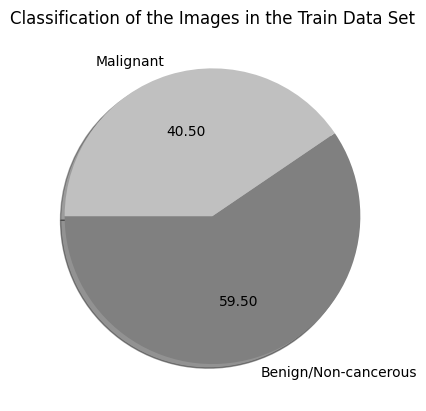

<Figure size 1600x1600 with 0 Axes>

In [4]:
# Plot a pie chart which shows the classification of the images in train dataset

labels_count = df.label.value_counts()
plt.pie(labels_count, labels=['Benign/Non-cancerous', 'Malignant'], startangle=180, 
        autopct='%1.2f', colors=['gray','silver'], shadow=True)
plt.title("Classification of the Images in the Train Data Set")
plt.figure(figsize=(16,16))
plt.show()

In [5]:
# Set paths to training and test data

train_path = 'train/'
test_path =  'test/'

# Load the train filenames into a dataframe

train_df = pd.DataFrame({'path': glob(os.path.join(train_path,'*.tif'))})
train_df.head(5)

# Keep only the file names in 'id'

train_df['id'] = train_df.path.map(lambda x: x.split('/')[1].split(".")[0])
train_df.head(5)

# Use the 'read_csv' function to read the labels csv

train_labels = pd.read_csv("train_labels.csv")

# Use the 'merge' function to merge labels and filepaths

train_df = train_df.merge(train_labels, on = "id")
train_df.head(10) # print the first ten entries

,path,id,label
0,train/f0c2a0b8ef3024f407fa97d852d49be0215cafe0...,f0c2a0b8ef3024f407fa97d852d49be0215cafe0,0
1,train/99ef485f205645918613cd04281098daa7c17819...,99ef485f205645918613cd04281098daa7c17819,1
2,train/e2612e173abd0e8bb54a3c3db3f264b63d80bffb...,e2612e173abd0e8bb54a3c3db3f264b63d80bffb,1
3,train/6d1bb57c0606f05dbd75f90a8d9e21a57e1267e0...,6d1bb57c0606f05dbd75f90a8d9e21a57e1267e0,0
4,train/9c043ab2adadfeb758c71d21432fccd3e43565c0...,9c043ab2adadfeb758c71d21432fccd3e43565c0,1
5,train/9cc775713dd09351172a350871a547346af08027...,9cc775713dd09351172a350871a547346af08027,0
6,train/1996c210f020134e986823ca7d4df0a70a799c34...,1996c210f020134e986823ca7d4df0a70a799c34,1
7,train/270d16e6b9d88f09f3cc2e538f23091b186a33e5...,270d16e6b9d88f09f3cc2e538f23091b186a33e5,1
8,train/731fe361f4af33b5e4f11d74b2bc7508171904e6...,731fe361f4af33b5e4f11d74b2bc7508171904e6,1
9,train/c7cf86c53ef00698e1e46f430e8527b534bd0368...,c7cf86c53ef00698e1e46f430e8527b534bd0368,0


In [6]:
# This functions loads N images using the dataframe df

def load_data(N,df):

    # Allocate a numpy array for the images (N, 96x96px, 3 channels, values 0 - 255)

    X = np.zeros([N,96,96,3],dtype=np.uint8) 

    # Convert the labels to a numpy array

    y = np.squeeze(df[['label']].values)[0:N]

    # Read images one by one, tdqm notebook displays a progress bar

    for i, row in tqdm(df.iterrows(), total=N):
        if i == N:
            break
        img = cv2.imread(row['path'])
        img = cv2.resize(img,(96, 96))
        X[i] = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #print(img.shape)
    return X,y

In [7]:
# We will use a sample of 80k images to train the model

N = 80000
train_data, train_labels = load_data(N=N,df=train_df) 

  0%|          | 0/80000 [00:00<?, ?it/s]

In [8]:
# Use 'torch.from_numpy' property to convert NumPy arrays to PyTorch tensors

X_tensor = torch.from_numpy(train_data).permute(0, 3, 1, 2).float()
y_tensor = torch.from_numpy(train_labels).float()

In [9]:
# Split the train sample set into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [10]:
# Use 'TensorDataset' function to convert train and validation sets into a Tensor dataset

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

In [11]:
# Create DataLoader instances for training and validation sets

batch_size = 500
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [12]:
# Define a class that calls the augmentation function - transform - as parameter

class ImageTransform(nn.Module):
    def __init__(self, transform):
        super(ImageTransform, self).__init__()
        self.transform = transform

    def forward(self, x):
        return self.transform(x)

### CNN Model

In [13]:
# Define the CNN model

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.input_transform = ImageTransform(transform = data_transforms['train'])

        # We apply three convolution layers

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 12 * 12, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    # Define forward propogation

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.pool(x)

        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.relu(x)
        
        x = self.fc2(x)
        x = self.relu(x)
        
        x = self.fc3(x)
        x = self.sigmoid(x)
        
        return x

### Image Transformation and Augmentation

In [14]:
# Image transformations and augmentations

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(96),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(96),
        transforms.CenterCrop(96),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

### Loss Function, Optimizers and Learning Rate Schedulers

In [15]:
# Initialize the model, loss function, and optimizers SGD and Adam

model = CNN()
criterion = nn.BCELoss()
adam_optimizer = optim.Adam(model.parameters(), lr=0.000015)
sgd_optimizer = optim.SGD(model.parameters(), lr = 0.000005, momentum = 0.9)
sgd_scheduler = optim.lr_scheduler.StepLR(sgd_optimizer, step_size = 5, gamma = 0.1)
adam_scheduler = optim.lr_scheduler.StepLR(adam_optimizer, step_size = 5, gamma = 0.1)

Epoch [1/5], Loss: 0.4826, AUC: 0.8609


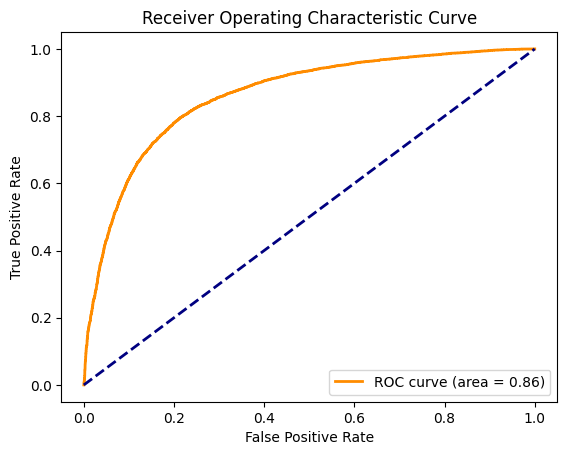

Epoch [2/5], Loss: 0.4293, AUC: 0.8720


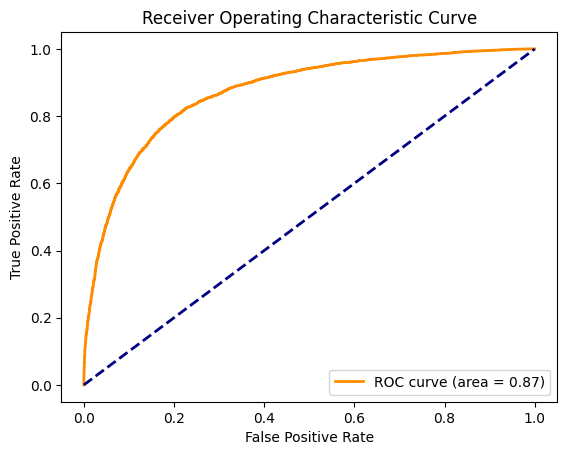

Epoch [3/5], Loss: 0.4669, AUC: 0.8796


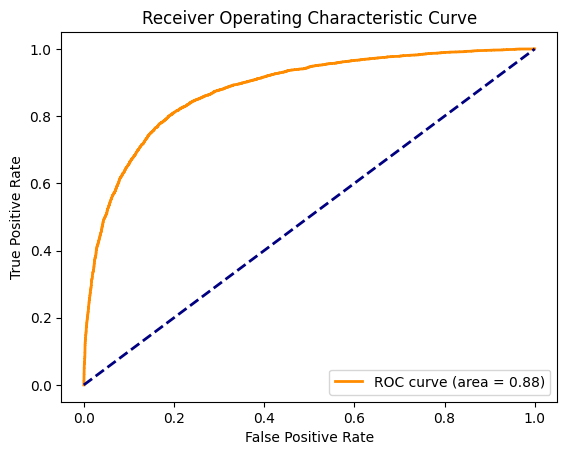

Epoch [4/5], Loss: 0.4596, AUC: 0.8461


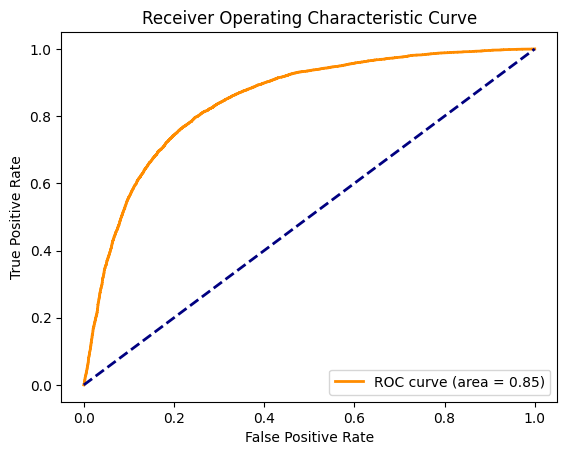

Epoch [5/5], Loss: 0.4813, AUC: 0.8286


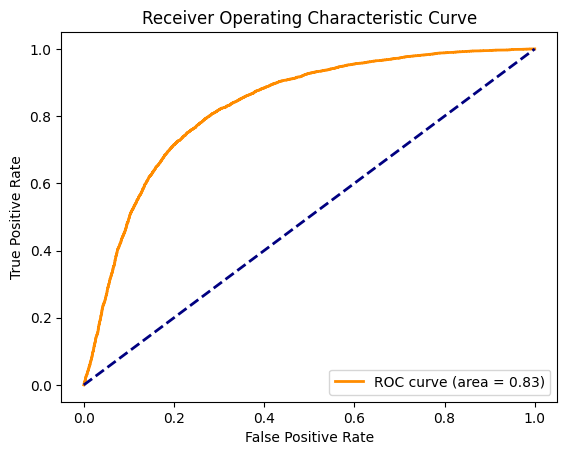

In [16]:
# Training loop

num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Optimize with SGD

        sgd_optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        sgd_optimizer.step()

        # Optimize with Adam

        adam_optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        adam_optimizer.step()

    # Validation
    
    model.eval()
    val_loss = 0.0
    fpr = []
    tpr = []
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in val_loader:

            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss += criterion(outputs.squeeze(), labels)
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

        # Set the learning rate using the scheduler

        sgd_scheduler.step()
        adam_scheduler.step()

        # Use 'roc_curve' function to generate ROC curve

        fpr, tpr, _ = roc_curve(all_labels, all_preds)
        roc_auc = roc_auc_score(all_labels,all_preds)
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, AUC: {roc_auc:.4f}')
        
        # Plot ROC curve
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve')
        plt.legend(loc="lower right")
    plt.show()



### Testing the model

In [18]:
# Load the filenames

test_df = pd.DataFrame({'path': glob(os.path.join(test_path,'*.tif'))})
test_df.head(5)

# Keep only the file names in 'id'

test_df['id'] = test_df.path.map(lambda x: x.split('/')[1].split(".")[0])
test_df.head(5)
test_df['label'] = 0.0
test_df.head(10)

,path,id,label
0,test/fd0a060ef9c30c9a83f6b4bfb568db74b099154d.tif,fd0a060ef9c30c9a83f6b4bfb568db74b099154d,0.0
1,test/1f9ee06f06d329eb7902a2e03ab3835dd0484581.tif,1f9ee06f06d329eb7902a2e03ab3835dd0484581,0.0
2,test/19709bec800f372d0b1d085da6933dd3ef108846.tif,19709bec800f372d0b1d085da6933dd3ef108846,0.0
3,test/7a34fc34523063f13f0617f7518a0330f6187bd3.tif,7a34fc34523063f13f0617f7518a0330f6187bd3,0.0
4,test/93be720ca2b95fe2126cf2e1ed752bd759e9b0ed.tif,93be720ca2b95fe2126cf2e1ed752bd759e9b0ed,0.0
5,test/761dde7de22cb39a0dd67ce472163d66e5ac1568.tif,761dde7de22cb39a0dd67ce472163d66e5ac1568,0.0
6,test/58055ce8819717a100b48d019e139be4fdf997c0.tif,58055ce8819717a100b48d019e139be4fdf997c0,0.0
7,test/9735b584631f4b942b022d40aecdbe2aa8f6ae5e.tif,9735b584631f4b942b022d40aecdbe2aa8f6ae5e,0.0
8,test/860bbd33f8483a45858c4998021bc7434117deda.tif,860bbd33f8483a45858c4998021bc7434117deda,0.0
9,test/99050fbce64ae16e48e8a3b09d38f3b16df63fbe.tif,99050fbce64ae16e48e8a3b09d38f3b16df63fbe,0.0


In [19]:
# Load test data images

N = 57458
test_data, test_labels = load_data(N=N,df=test_df) 

  0%|          | 0/57458 [00:00<?, ?it/s]

In [20]:
# Convert NumPy arrays to PyTorch tensors

test_X_tensor = torch.from_numpy(test_data).permute(0, 3, 1, 2).float()
test_y_tensor = torch.from_numpy(test_labels).float()

# Convert the test PyTorch tensors to Tensor dataset

test_dataset = TensorDataset(test_X_tensor, test_y_tensor)

In [21]:
# Create DataLoader instances for test data set

batch_size = 256
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

### Model Testing

In [22]:
# Testing

model.eval()
test_preds = []

# Predicting the ouputs using the test dataset as input

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        test_preds.extend(outputs.cpu().numpy())
test_df['label'] = test_preds

In [23]:
for i in range(len(test_df)):
    test_df.label[i] = float(np.round(test_df.label[i],1))

/var/folders/c0/f1s_z1s10db9z5zsf0wzj1yw0000gn/T/ipykernel_30827/3768244851.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_df.label[i] = float(np.round(test_df.label[i],1))
/var/folders/c0/f1s_z1s10db9z5zsf0wzj1yw0000gn/T/ipykernel_30827/3768244851.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  test_df.label[i] = float(np.round(test_df.label[i],1))
/var/folders/c0/f1s_z1s10db9z5zsf0wzj1yw0000gn/T/ipykernel_30827/3768244851.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (D

In [24]:
test_df.label.value_counts()

label
0.800000011920929      19098
0.699999988079071      10772
0.6000000238418579      6599
0.5                     5453
0.4000000059604645      4956
0.30000001192092896     4226
0.20000000298023224     3707
0.10000000149011612     2508
0.0                      138
0.8999999761581421         1
Name: count, dtype: int64

In [25]:
# Write the predictions to 'test_label.csv' file

test_df.to_csv('test_label.csv')